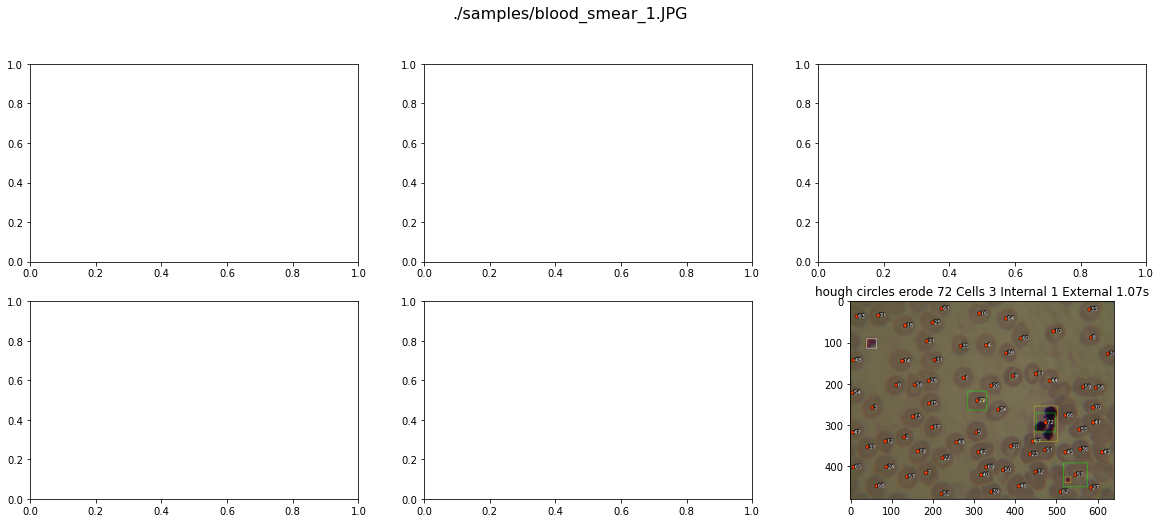

In [1]:
import os
import glob
from ipynb.fs.full.cell_lib import *

path = './samples/blood_smear_1.JPG'

def run_all(path):
    
    fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(20,8))
    
#     images, stats = otsu_method(path)
#     ax[0,0].set_title("otsu %d Cells %d Internal %d External %s" % stats)
#     ax[0,0].imshow(images[0])
    
#     images, stats = otsu_method(path, blur=False)
#     ax[0,1].set_title("otsu w/out blur %d Cells %d Internal %d External %s" % stats)
#     ax[0,1].imshow(images[0])

#     images, stats = hsv_method(path)
#     ax[0,2].set_title("hsv %d Cells %d Internal %d External %s" % stats)
#     ax[0,2].imshow(images[0])

#     images, stats = hsv_method(path, erode=False)
#     ax[1,0].set_title("hsv w/out erode %d Cells %d Internal %d External %s" % stats)
#     ax[1,0].imshow(images[0])

#     images, stats = watershed_method(path)
#     ax[1,1].set_title("watershed erode %d Cells %d Internal %d External %s" % stats)
#     ax[1,1].imshow(images[0])

    images, stats = hough_circles_method(path)
    ax[1,2].set_title("hough circles erode %d Cells %d Internal %d External %s" % stats)
    ax[1,2].imshow(images[0])
    
    fig.suptitle(path, fontsize=16)
    
    plt.show()
    
run_all(path)

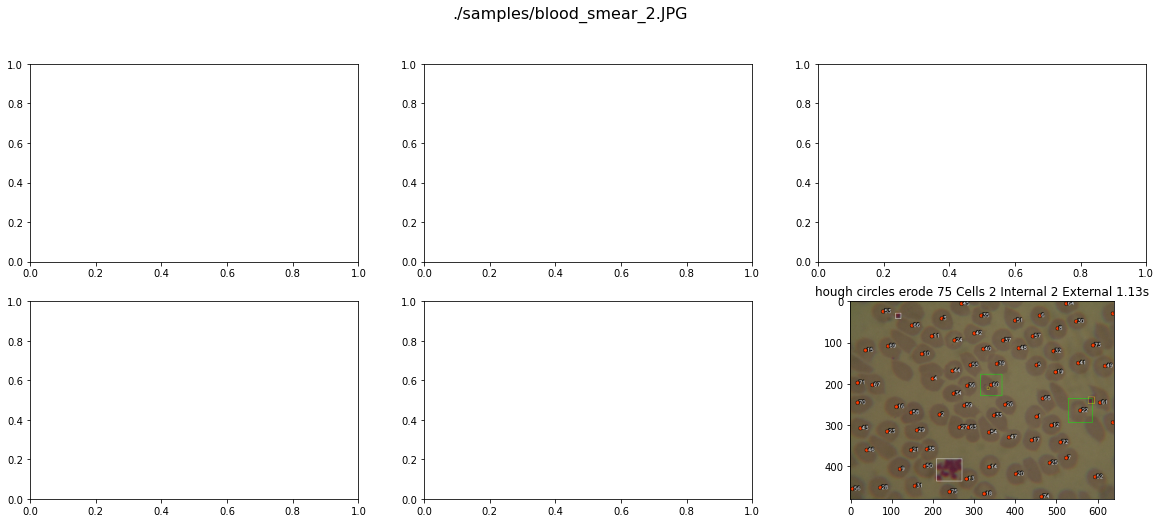

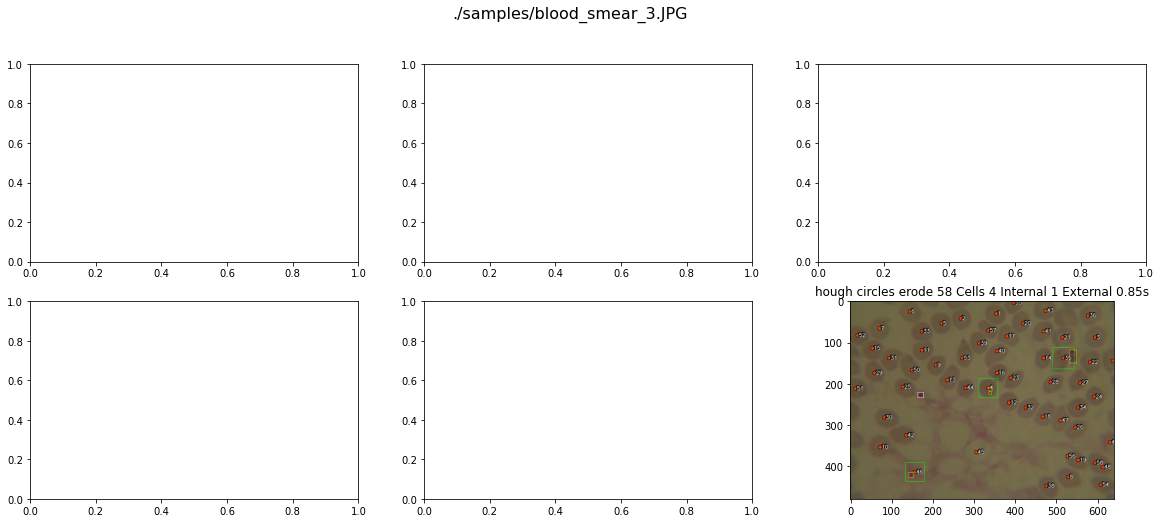

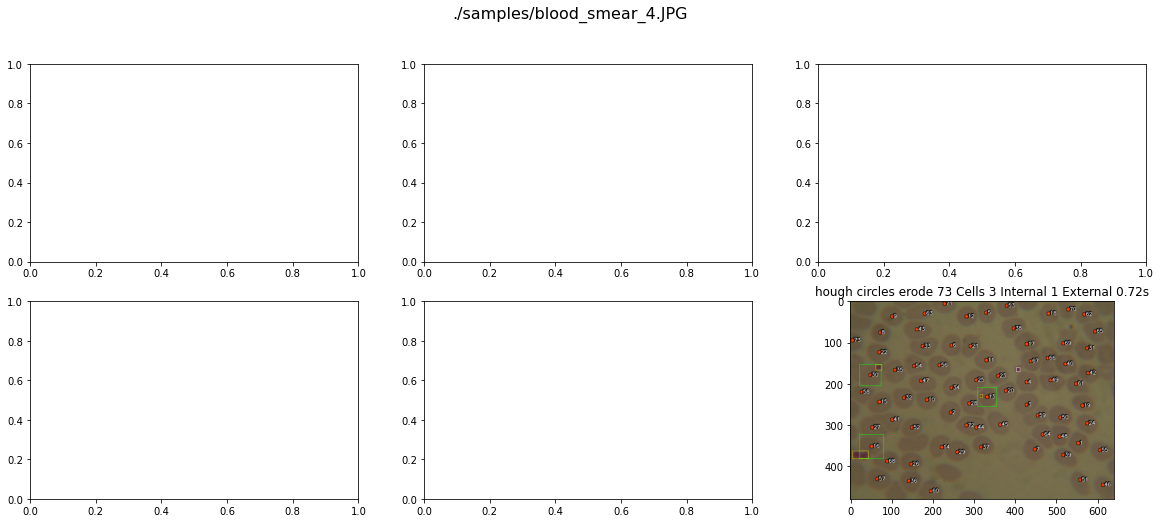

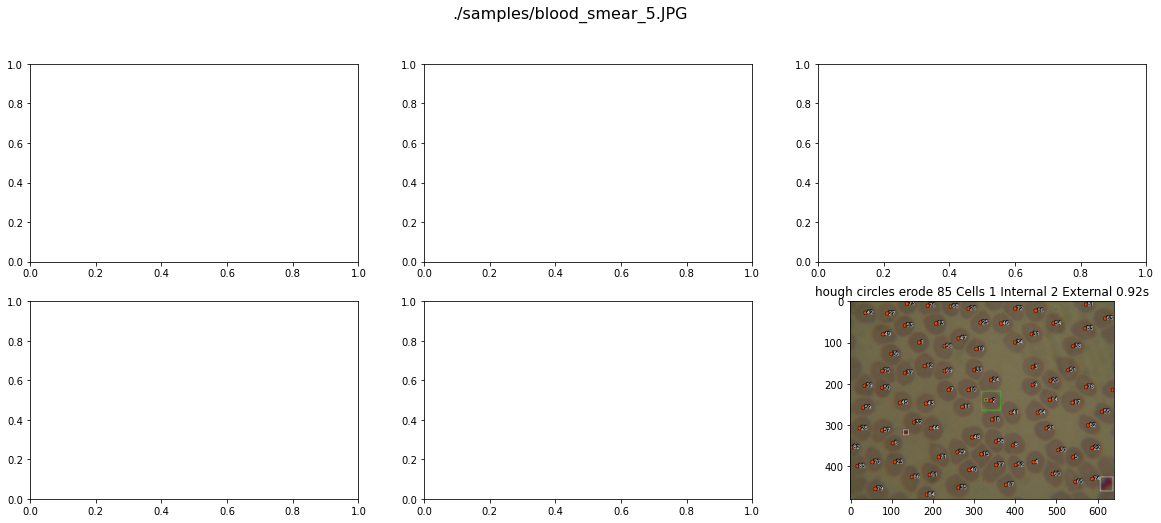

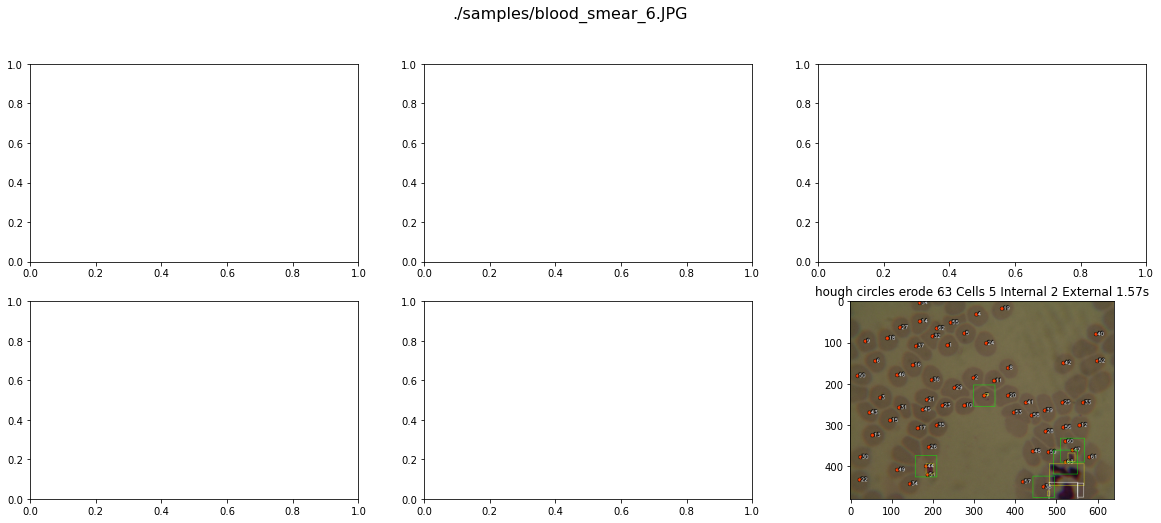

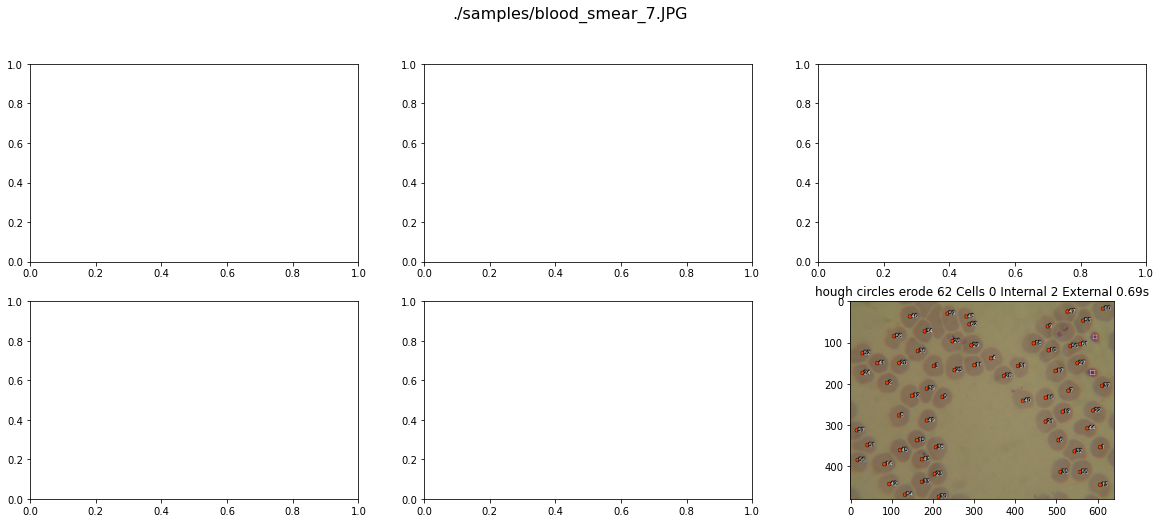

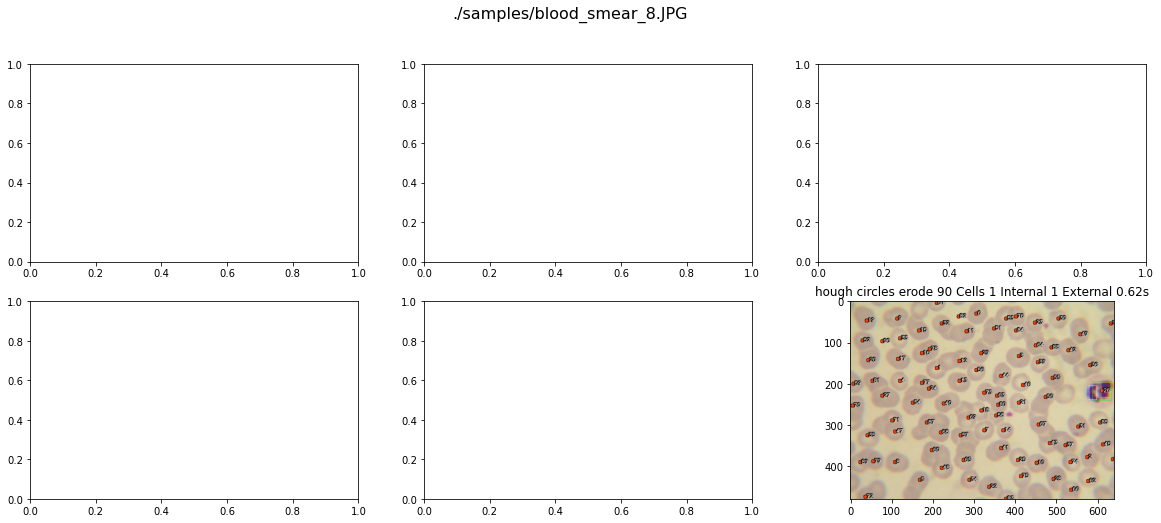

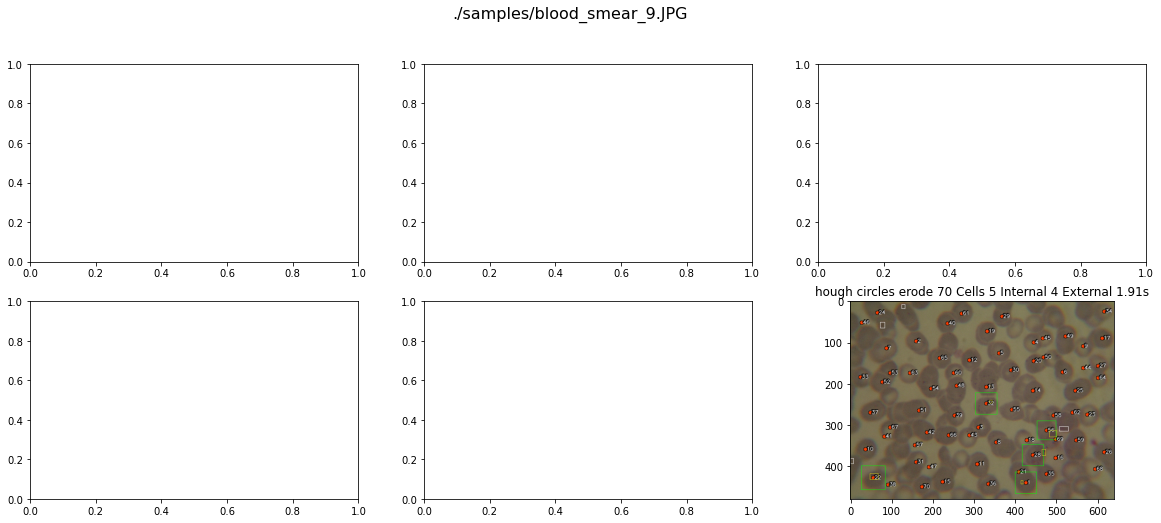

In [2]:
name = "./samples/blood_smear_%d.JPG"
for i in range(2,10):
    path = name % i
    run_all(path)